In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
ipl=pd.read_csv('C:/Data Sets/ipl_2022_dataset.csv')

In [66]:
ipl.shape

(633, 11)

In [67]:
ipl.describe()

,COST IN ₹ (CR.),Cost IN $ (000)
count,633.000000,633.000000
mean,1.383728,179.884676
std,3.148242,409.271463
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.550000,71.500000
max,17.000000,2210.000000


In [5]:
ipl.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [6]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [7]:
ipl.isnull().sum()

Unnamed: 0           0
Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [8]:
ipl.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

In [9]:
ipl.drop(['Unnamed: 0'],axis='columns',inplace=True)

In [10]:
ipl

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [11]:
ipl[ipl['Cost IN $ (000)'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [12]:
ipl['Cost IN $ (000)'] = ipl['Cost IN $ (000)'].fillna(0)
ipl['COST IN ₹ (CR.)'] = ipl['COST IN ₹ (CR.)'].fillna(0)

In [13]:
ipl['2021 Squad']=ipl['2021 Squad'].fillna('Not Participated')

In [14]:
ipl.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [15]:
teams=ipl[ipl['COST IN ₹ (CR.)']>0]['Team'].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [16]:
ipl['status']=ipl['Team'].replace(teams,'sold')

In [17]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold


In [56]:
ipl[ipl['Player'].duplicated(keep=False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),Prev_team,Team,status,base_price_unit,base_price,retention
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,sold,Lakh,20,From Auction
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold,Cr,1.5,From Auction
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold,Lakh,20,From Auction
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold,Lakh,20,From Auction
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold,Lakh,20,From Auction
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold,Lakh,20,From Auction
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold,Lakh,20,From Auction
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold,Lakh,20,From Auction


In [57]:
import pandas as pd

data = {'Column1': [1, 2, 3, 2, 4, 3],
        'Column2': ['A', 'B', 'C', 'B', 'D', 'C']}
df = pd.DataFrame(data)

duplicates = df.duplicated(keep=False)

df['duplicated'] = duplicates
print(df)


   Column1 Column2  duplicated
0        1       A       False
1        2       B        True
2        3       C        True
3        2       B        True
4        4       D       False
5        3       C        True


In [19]:
#how many players are participated in 20222 ipl auction?
ipl.shape[0]

633

In [20]:
# how many types of players have participated?
types=ipl['TYPE'].value_counts()
types.reset_index()

,index,TYPE
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


[]

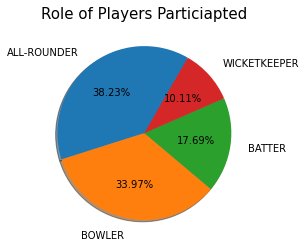

In [21]:
plt.pie(types.values,labels=types.index,labeldistance=1.2,autopct='%1.2f%%',shadow=True,startangle=60)
plt.title('Role of Players Particiapted',fontsize=15)
plt.plot()

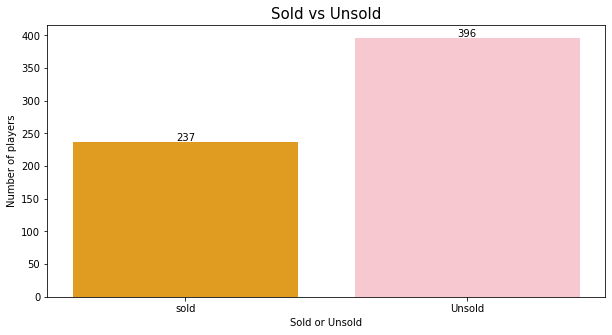

In [22]:
# players sold and unsold using a bar grpah
plt.figure(figsize=(10,5))
fig=sns.countplot(ipl['status'],palette=['Orange','Pink'])
plt.xlabel('Sold or Unsold')
plt.ylabel('Number of players')
plt.title('Sold vs Unsold',fontsize=15)
plt.plot()
for p in fig.patches:
    fig.annotate(format(p.get_height(),'.0f'),(p.get_x()+
    p.get_width()/2.,p.get_height()),ha='center',va='center',
    xytext=(0,4),textcoords='offset points')
                

In [23]:
ipl.groupby('status')['Player'].count()

status
Unsold    396
sold      237
Name: Player, dtype: int64

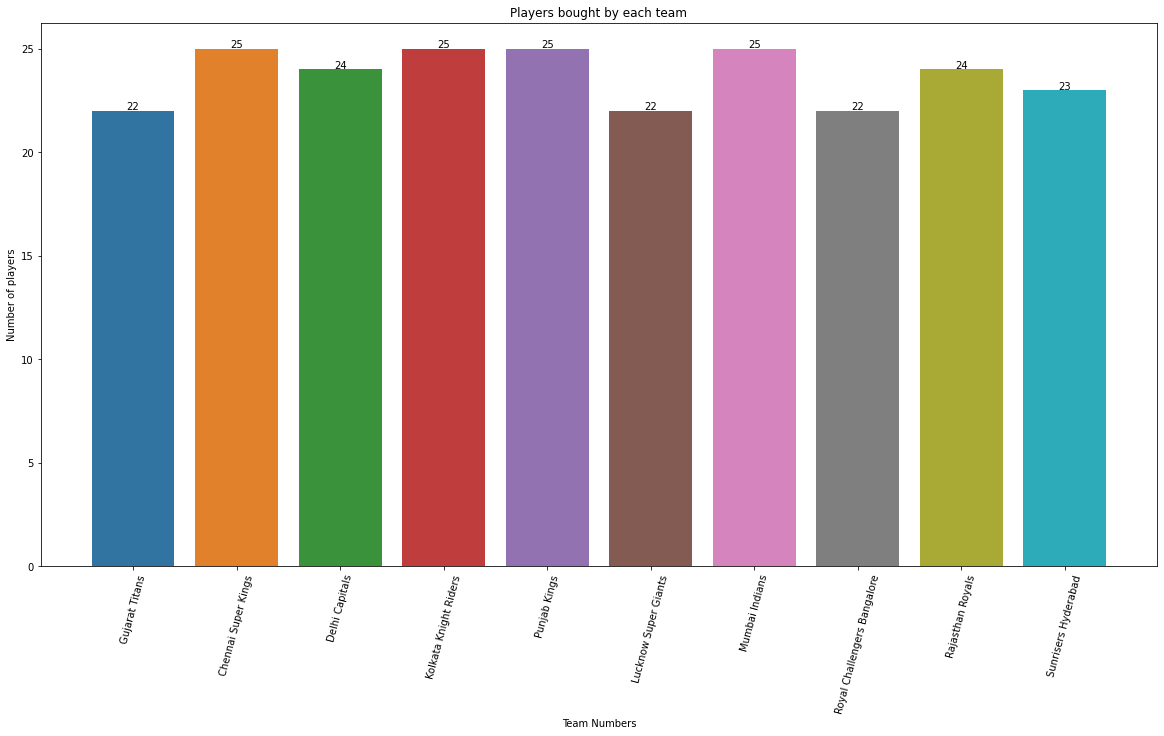

In [24]:
# Total number of players bought by each team.
plt.figure(figsize=(20,10))
fig=sns.countplot(ipl[ipl['Team']!='Unsold']['Team'])
plt.xlabel('Team Numbers')
plt.ylabel('Number of players')
plt.title('Players bought by each team',fontsize=12)
plt.xticks(rotation=75)
plt.plot()
for p in fig.patches:
    fig.annotate(format(p.get_height(),'.0f'),(p.get_x()+
    p.get_width()/2.,p.get_height()),ha='center',va='center',
    xytext=(0,4),textcoords='offset points')
                


In [35]:
ipl['retention']=ipl['Base Price']

In [36]:
ipl['retention'].replace(['2 Cr','40 Lakh','20 Lakh','1 Cr','75 Lakh','50 Lakh','30 Lakh','1.5 Cr'],'From Auction',inplace=True)

In [37]:
ipl['Base Price'].replace('Draft Pick',0,inplace=True)

In [38]:
ipl['base_price_unit']=ipl['Base Price'].apply(lambda x:str(x).split(' ')[-1])
ipl['base_price']=ipl['Base Price'].apply(lambda x:str(x).split(' ')[0])

In [39]:
ipl['base_price'].replace('Retained',0,inplace=True)

In [40]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,base_price_unit,base_price,retention
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,0,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,0,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,Cr,2,From Auction
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,Lakh,40,From Auction
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,0,0,0


In [62]:
# Total players retained and brought
ipl.groupby(['Team','retention'])['retention'].count()#[:-1]

Team                         retention   
Chennai Super Kings          From Auction     21
                             Retained          4
Delhi Capitals               From Auction     20
                             Retained          4
Gujarat Titans               0                 3
                             From Auction     19
Kolkata Knight Riders        From Auction     21
                             Retained          4
Lucknow Super Giants         0                 3
                             From Auction     19
Mumbai Indians               From Auction     21
                             Retained          4
Punjab Kings                 From Auction     23
                             Retained          2
Rajasthan Royals             From Auction     21
                             Retained          3
Royal Challengers Bangalore  From Auction     19
                             Retained          3
Sunrisers Hyderabad          From Auction     20
                           

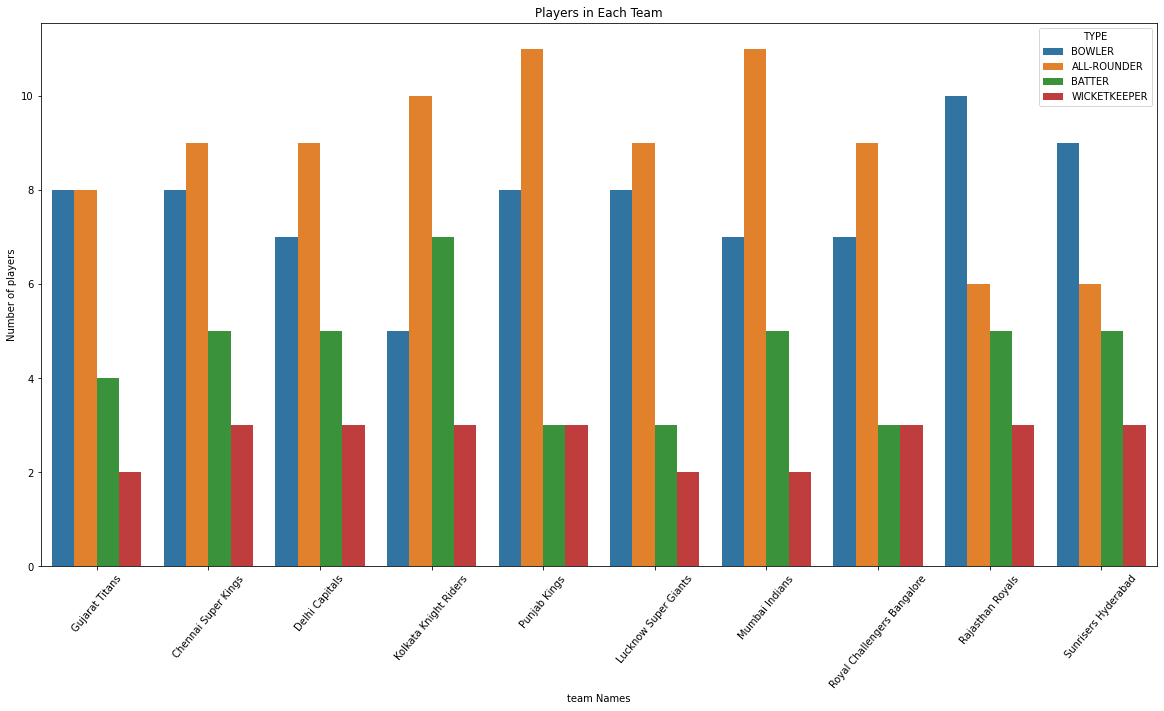

In [64]:
plt.figure(figsize=(20,10))
fig=sns.countplot(ipl[ipl['Team']!='Unsold']['Team'],hue=ipl['TYPE'])
plt.title('Players in Each Team')
plt.xlabel('team Names')
plt.ylabel('Number of players')
plt.xticks(rotation=50)
plt.show()

In [65]:
# highest amount spent on a single payer in each team
ipl[ipl['retention']=='From Auction'].groupby(['Team'])['COST IN ₹ (CR.)'].max().sort_values(ascending=False)

Team
Mumbai Indians                 15.25
Chennai Super Kings            14.00
Kolkata Knight Riders          12.25
Punjab Kings                   11.50
Delhi Capitals                 10.75
Royal Challengers Bangalore    10.75
Sunrisers Hyderabad            10.75
Gujarat Titans                 10.00
Lucknow Super Giants           10.00
Rajasthan Royals               10.00
Unsold                          0.00
Name: COST IN ₹ (CR.), dtype: float64

In [44]:
# Player retained at a maximum price
ipl[ipl['retention']=='Retained'].sort_values(by='COST IN ₹ (CR.)', ascending = False).head(1)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,base_price_unit,base_price,retention
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,sold,Retained,0,Retained


In [45]:
ipl=ipl.rename(columns={'2021 Squad':'Prev_team'})

In [46]:
ipl

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),Prev_team,Team,status,base_price_unit,base_price,retention
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,0,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,0,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,Cr,2,From Auction
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,Lakh,40,From Auction
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated,Unsold,Unsold,Lakh,20,From Auction
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,Lakh,20,From Auction
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,Lakh,20,From Auction
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,Lakh,20,From Auction


In [47]:
# unsold players
ipl[(ipl.Prev_team!='Not Participated')&(ipl.Team=='Unsold')][['Player','Prev_team']]

,Player,Prev_team
237,Suresh Raina,CSK
238,Steve Smith,DC
239,Shakib Al Hasan,KKR
240,Amit Mishra,DC
241,Adil Rashid,PBKS
242,Imran Tahir,CSK
243,Mujeeb Zadran,SRH
244,Adam Zampa,RCB
245,Rajat Patidar,RCB
246,Mohammed Azharuddeen,RCB


In [48]:
# Top 5 bowlers
ipl[(ipl['retention']=='From Auction')&(ipl['TYPE']=='BOWLER')].sort_values(by='COST IN ₹ (CR.)',ascending=False).head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),Prev_team,Team,status,base_price_unit,base_price,retention
23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings,sold,Cr,2,From Auction
48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals,sold,Cr,2,From Auction
192,Prasidh Krishna,1 Cr,BOWLER,10.00,1300.0,KKR,Rajasthan Royals,sold,Cr,1,From Auction
2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans,sold,Cr,2,From Auction
122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants,sold,Lakh,20,From Auction


In [49]:
# Top 5 Batsmens
ipl[(ipl['retention']=='From Auction')&(ipl['TYPE']=='BATTER')].sort_values(by='COST IN ₹ (CR.)',ascending=False).head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),Prev_team,Team,status,base_price_unit,base_price,retention
71,Shreyas Iyer,2 Cr,BATTER,12.25,1592.5,DC,Kolkata Knight Riders,sold,Cr,2,From Auction
193,Shimron Hetmyer,1.5 Cr,BATTER,8.50,1105.0,DC,Rajasthan Royals,sold,Cr,1.5,From Auction
217,Rahul Tripathi,40 Lakh,BATTER,8.50,1105.0,KKR,Sunrisers Hyderabad,sold,Lakh,40,From Auction
100,Shikhar Dhawan,2 Cr,BATTER,8.25,1072.5,DC,Punjab Kings,sold,Cr,2,From Auction
195,Devdutt Padikkal,2 Cr,BATTER,7.75,1007.5,RCB,Rajasthan Royals,sold,Cr,2,From Auction


In [50]:
# Top 5 all-rounders
ipl[(ipl['retention']=='From Auction')&(ipl['TYPE']=='ALL-ROUNDER')].sort_values(by='COST IN ₹ (CR.)',ascending=False).head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),Prev_team,Team,status,base_price_unit,base_price,retention
97,Liam Livingstone,1 Cr,ALL-ROUNDER,11.50,1495.0,RR,Punjab Kings,sold,Cr,1,From Auction
170,Wanindu Hasaranga,1 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore,sold,Cr,1,From Auction
171,Harshal Patel,2 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore,sold,Cr,2,From Auction
99,Shahrukh Khan,40 Lakh,ALL-ROUNDER,9.00,1170.0,PBKS,Punjab Kings,sold,Lakh,40,From Auction
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.00,1170.0,RR,Gujarat Titans,sold,Lakh,40,From Auction


In [55]:
ipl[(ipl['retention']=='From Auction')&(ipl['TYPE']=='WICKETKEEPER')].sort_values(by='COST IN ₹ (CR.)',ascending=False).head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),Prev_team,Team,status,base_price_unit,base_price,retention
144,Ishan Kishan,2 Cr,WICKETKEEPER,15.25,1982.5,MI,Mumbai Indians,sold,Cr,2,From Auction
215,Nicholas Pooran,1.5 Cr,WICKETKEEPER,10.75,1397.5,PBKS,Sunrisers Hyderabad,sold,Cr,1.5,From Auction
127,Quinton De Kock,2 Cr,WICKETKEEPER,6.75,877.5,MI,Lucknow Super Giants,sold,Cr,2,From Auction
26,Ambati Rayudu,2 Cr,WICKETKEEPER,6.75,877.5,CSK,Chennai Super Kings,sold,Cr,2,From Auction
101,Jonny Bairstow,1.5 Cr,WICKETKEEPER,6.75,877.5,SRH,Punjab Kings,sold,Cr,1.5,From Auction
